# OCR with Keras, TensorFlow, and Deep Learning

# Text data and known labels


In [5]:
import numpy as np
import cv2
import os

+ connect drive 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = r'/content/drive/MyDrive/OCR_ML_CV/training_data'
test_dir = r'/content/drive/MyDrive/OCR_ML_CV/testing_data'

In [ ]:
#  Load training images
train_images = []
train_labels = []

for label in range(10):
    folder_path = os.path.join(train_dir, str(label))
    file_names = os.listdir(folder_path)

    for file_name in file_names:
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        train_images.append(image)
        train_labels.append(label)

# Load A to Z training images
for label in range(ord('A'), ord('Z')+1):
    folder_path = os.path.join(train_dir, chr(label))
    file_names = os.listdir(folder_path)

    for file_name in file_names:
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        train_images.append(image)
        train_labels.append(label - ord('A') + 10)

In [ ]:
print("Train Labels:", np.unique(train_labels))

Train Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [ ]:
# Convert lists to NumPy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
# Load test images
test_images = []
test_labels = []

for label in range(10):
    folder_path = os.path.join(test_dir, str(label))
    file_names = os.listdir(folder_path)

    for file_name in file_names:
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        test_images.append(image)
        test_labels.append(label)

# Load A to Z test images
for label in range(ord('A'), ord('Z')+1):
    folder_path = os.path.join(test_dir, chr(label))
    file_names = os.listdir(folder_path)

    for file_name in file_names:
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (28, 28))
        test_images.append(image)
        test_labels.append(label - ord('A') +10)

In [ ]:
print("Test Labels:", np.unique(test_labels))

Test Labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35]


In [ ]:
# Convert lists to NumPy arrays
test_images = np.array(test_images)
test_labels = np.array(test_labels)

# Data Preprocessing

In [ ]:
# Data Preprocessing reshaping with depth 1 and normalizing 0 to 1
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1) 
train_images = train_images / 255.0
test_images = test_images / 255.0

# Build Model

In [ ]:
#  define a linear stack of layers (structure)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
''' Define the model architecture consists of
    - Convolutional layer
    - Max pooling layer
    - Flatten layer
    - Fully connected layer
'''
model = Sequential()

# uses 32 filters of size 3x3 and employs the ReLU activation function= max( 0 , x )
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

# taking the maximum value within each region 
# reduce the dimensions 
model.add(MaxPooling2D(pool_size=(2, 2)))

# convert dimensions to 1D vector
model.add(Flatten())

# 128 neurons with the ReLU activation function
model.add(Dense(128, activation='relu'))

# output
# 36 neurons with the softmax activation function= exp(xi) / sum(exp(xj))
# 36 possible output classes => (10 digits and 26 letters)
model.add(Dense(36, activation='softmax')) 

            # adjusts the learning rate dynamically for each weight.
model.compile(optimizer='adam', # Adaptive Moment Estimation
              loss='categorical_crossentropy', # minimize the difference between the predicted probabilities and the true labels to improve the accuracy
              metrics=['accuracy'] # to evaluate the performance of the model during training and testing
              ) 

# Train Model

In [ ]:
model.fit(train_images, 
          train_labels, 
          epochs=10, # how many times the model will iterate on dataset during training.
          batch_size=32 # number of samples processed by the model at each iteration.
          )

Epoch 1/10
645/645 [==============================] - 18s 26ms/step - loss: 0.6698 - accuracy: 0.8335
Epoch 2/10
645/645 [==============================] - 17s 27ms/step - loss: 0.2140 - accuracy: 0.9428
Epoch 3/10
645/645 [==============================] - 18s 28ms/step - loss: 0.1596 - accuracy: 0.9541
Epoch 4/10
645/645 [==============================] - 22s 35ms/step - loss: 0.1224 - accuracy: 0.9613
Epoch 5/10
645/645 [==============================] - 20s 30ms/step - loss: 0.0993 - accuracy: 0.9679
Epoch 6/10
645/645 [==============================] - 17s 26ms/step - loss: 0.0835 - accuracy: 0.9717
Epoch 7/10
645/645 [==============================] - 19s 29ms/step - loss: 0.0746 - accuracy: 0.9737
Epoch 8/10
645/645 [==============================] - 17s 26ms/step - loss: 0.0577 - accuracy: 0.9781
Epoch 9/10
645/645 [==============================] - 17s 26ms/step - loss: 0.0514 - accuracy: 0.9800
Epoch 10/10
645/645 [==============================] - 18s 27ms/step - loss: 0.050

# Model Evaluation

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, 
                                          test_labels, 
                                          verbose=0) # no progress information should be displayed during evaluation
# average loss value of the model on the test data,
print("Test Loss:", test_loss)
# proportion of correctly predicted labels to the total number of samples
print("Test Accuracy:", test_accuracy)

Test Loss: 0.0443127416074276
Test Accuracy: 0.9801587462425232


+ make predictions on test data using the trained model

In [ ]:
# get predicted labels for the test images as 
predictions = model.predict(test_images)

# Convert predictions to categorical labels
# stores the predicted labels for test images,
predicted_labels = np.argmax(predictions, axis=1) # 1 are labels 

# Convert test_labels from one-hot encoded format to categorical labels
# stores the true labels for test images,
true_labels = np.argmax(test_labels, axis=1)

32/32 [==============================] - 0s 8ms/step


In [ ]:
from sklearn.metrics import confusion_matrix

+ Confusion matrix Table that shows the

  + true positive - true negative

  + false positive - false negative

In [ ]:
cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[10  0  0 ...  0  0  0]
 [ 0 28  0 ...  0  0  0]
 [ 0  0 28 ...  0  0  0]
 ...
 [ 0  0  0 ... 28  0  0]
 [ 0  0  0 ...  0 28  0]
 [ 0  0  0 ...  0  0 28]]


# Visualization

In [12]:
from matplotlib import pyplot as plt
import seaborn as sns

**Plotting Confusion Matrix Heatmap**

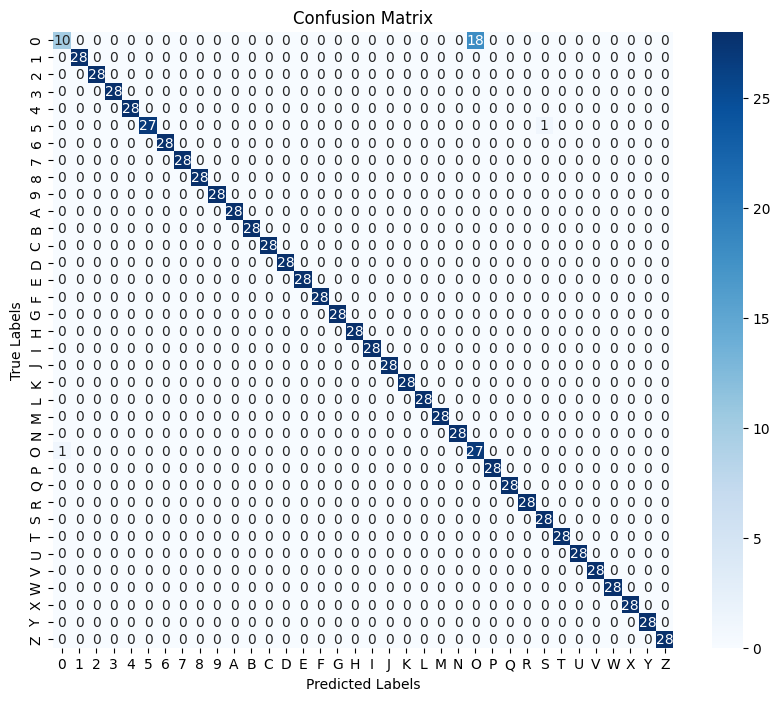

In [ ]:
classes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
plt.figure(figsize=(10, 8))
sns.heatmap(cm, 
            annot=True, 
            fmt='d',
            cmap='Blues', 
            xticklabels=classes,
            yticklabels=classes)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Save the model

In [ ]:
model.save('OCR_CNN_model.h5')

# Load the model

In [1]:
from keras.models import load_model

In [2]:
loaded_model = load_model('OCR_CNN_model.h5')

# Predicting new results

+ **characters**

In [3]:
def extract_and_recognize_chars(image):
    # Preprocess the image
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    resized_image = cv2.resize(grayscale_image, (28, 28))
    normalized_image = resized_image / 255.0
    reshaped_image = np.reshape(normalized_image, (1, 28, 28, 1))

    # Use the loaded model for prediction
    predictions = loaded_model.predict(reshaped_image)
    predicted_label = np.argmax(predictions)

    # Convert the predicted label to the corresponding character
    if predicted_label < 10:
        recognized_text = str(predicted_label)
    else:
        recognized_text = chr(predicted_label - 10 + ord('A'))

    return recognized_text

Text(0.5, 1.0, 'input char')

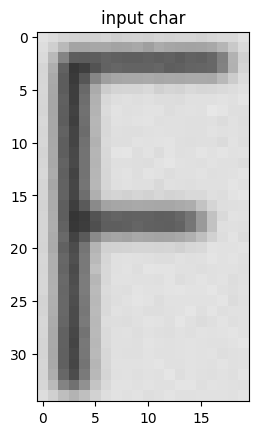

In [14]:
# Load the test image
char_image_path = 'F.png'
char_image = cv2.imread(char_image_path)
plt.imshow(char_image)
plt.title("input char")

In [7]:
# Perform text extraction and recognition
recognized_char = extract_and_recognize_chars(char_image)

1/1 [==============================] - 0s 344ms/step


In [10]:
# Display recognized text
print("Recognized Char:", recognized_char)

Recognized Char: F


+ **text**

In [ ]:
# def extract_and_recognize_text(image):
#   gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#   blur = cv2.GaussianBlur(gray, (5, 5), 0)
#   thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

#   # Character Segmentation
#   contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#   recognized_text = ""

#   # Display intermediate steps
#   plt.subplot(131)
#   plt.imshow(gray, cmap='gray')
#   plt.title("Grayscale Image")
#   plt.subplot(132)
#   plt.imshow(blur, cmap='gray')
#   plt.title("Blurred Image")
#   plt.subplot(133)
#   plt.imshow(thresh, cmap='gray')
#   plt.title("Thresholded Image")
#   plt.show()

#   for cnt in contours:
#       x, y, w, h = cv2.boundingRect(cnt)

#       # Character Segmentation Verification
#       cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)  # Draw bounding boxes around characters

#       character_image = image[y:y+h, x:x+w]
#       character_image = cv2.cvtColor(character_image, cv2.COLOR_BGR2GRAY)
#       character_image = cv2.resize(character_image, (28, 28))
#       character_image = character_image.reshape(1, 28, 28, 1) / 255.0
      
#       # Character Resizing and Reshaping Verification
#       plt.imshow(character_image.squeeze(), cmap='gray')
#       plt.title("Character Image")
#       plt.show()

#       # Character Recognition
#       prediction = loaded_model.predict(character_image)
#       predicted_label = np.argmax(prediction)
#       recognized_text += str(chr(predicted_label))
      
#   return recognized_text

In [ ]:
# # Load the test image
# test_image_path = '7.png'
# test_image = cv2.imread(test_image_path)

In [ ]:
# # Perform text extraction and recognition
# recognized_text = extract_and_recognize_text(test_image)

In [ ]:
# # Display recognized text
# print("Recognized Text:", recognized_text)